<a href="https://colab.research.google.com/github/asrianda/disertasi/blob/main/lat1/Disertasi_pembelian_kembali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [256]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# avoid displaying warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
#import plotly.offline as pyoff
import plotly.graph_objs as go
#import plotly.figure_factory as ff
#AUC, confusion matrix

#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
import xgboost as xgb
import time
from sklearn.metrics import classification_report,confusion_matrix


from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [296]:
data=pd.read_csv('Data.csv')
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [297]:
data.shape

(442311, 8)

In [298]:
data.isnull().sum()

Invoice            0
StockCode          0
Description     2747
Quantity           1
InvoiceDate        1
Price              1
Customer ID    87928
Country            1
dtype: int64

In [299]:
#-- Melakukan Perubahan kolom --
data.rename(columns={'Invoice':'InvoiceNo', 'Customer ID':'CustomerID', 'Price':'UnitPrice'}, inplace=True)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [300]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442311 entries, 0 to 442310
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    442311 non-null  object 
 1   StockCode    442311 non-null  object 
 2   Description  439564 non-null  object 
 3   Quantity     442310 non-null  float64
 4   InvoiceDate  442310 non-null  object 
 5   UnitPrice    442310 non-null  float64
 6   CustomerID   354383 non-null  float64
 7   Country      442310 non-null  object 
dtypes: float64(3), object(5)
memory usage: 27.0+ MB


Sesuai prediksi, kolom ID Pelanggan dan Deskripsi, UnitPrice, Country masing-masing memiliki 13500 dan 261,1 dan 1 data hilang.

In [301]:
data.isnull().sum()

InvoiceNo          0
StockCode          0
Description     2747
Quantity           1
InvoiceDate        1
UnitPrice          1
CustomerID     87928
Country            1
dtype: int64

In [302]:
np.round(data.isnull().sum()["CustomerID"]/data.InvoiceNo.shape[0] * 100, 2)

19.88

In [303]:
#-- CustumerID yang hilang akan dihapus --
df_data = data.dropna()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354383 entries, 0 to 442309
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354383 non-null  object 
 1   StockCode    354383 non-null  object 
 2   Description  354383 non-null  object 
 3   Quantity     354383 non-null  float64
 4   InvoiceDate  354383 non-null  object 
 5   UnitPrice    354383 non-null  float64
 6   CustomerID   354383 non-null  float64
 7   Country      354383 non-null  object 
dtypes: float64(3), object(5)
memory usage: 24.3+ MB


In [304]:
df_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [305]:
#-- field InvoiceDate akan dikonversi ke to_datetime method --
df_data.InvoiceDate = pd.to_datetime(df_data.InvoiceDate)
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Berapa banyak pelanggan online yang ada dalam kumpulan data dan dari mana negara asal mereka?

In [306]:
print('Dataset, Toko retail online memiliki {} konsumen \
dari {} different countries.'.format(len(df_data.CustomerID.unique()), len(df_data.Country.unique())))

Dataset, Toko retail online memiliki 4118 konsumen dari 37 different countries.


In [307]:
#-- Konsumen negara mana saja yang banyak berkunjung --
ctm_cntry_df = df_data.groupby(['CustomerID', 'Country']).count().reset_index()

ctm_cntry_df = ctm_cntry_df.groupby('Country')['CustomerID'].count().reset_index().sort_values(
    by=['CustomerID'], ascending=False)

# Create a new column, Percentage to calculate the customer representation in percentage
ctm_cntry_df['Percentage']= np.round(ctm_cntry_df.CustomerID / ctm_cntry_df.CustomerID.sum() * 100, 2)

ctm_cntry_df.head(10)


,Country,CustomerID,Percentage
34,United Kingdom,3791,91.97
12,Germany,66,1.60
11,France,42,1.02
28,Spain,24,0.58
21,Netherlands,22,0.53
25,Portugal,18,0.44
3,Belgium,15,0.36
29,Sweden,15,0.36
30,Switzerland,13,0.32
0,Australia,13,0.32


Output di atas menunjukkan negara-negara teratas yang melakukan pembelian dari toko ritel online dengan Inggris menjadi negara dengan pelanggan tertinggi. Mereka mewakili sekitar 94,48% dari seluruh pelanggan online.

In [308]:
percent_margin = 0.25

# Create a new column, CountryCategory and set values to the corresponding values of the Country column
ctm_cntry_df['CountryCategory'] = ctm_cntry_df.Country

# Set Countries with Percentage less than or equal to percent_margin to 'Other Countries'

ctm_cntry_df.loc[ctm_cntry_df.Percentage <= percent_margin, 'CountryCategory'] = 'Other Countries'

ctm_cntry_df.head(11)

,Country,CustomerID,Percentage,CountryCategory
34,United Kingdom,3791,91.97,United Kingdom
12,Germany,66,1.60,Germany
11,France,42,1.02,France
28,Spain,24,0.58,Spain
21,Netherlands,22,0.53,Netherlands
25,Portugal,18,0.44,Portugal
3,Belgium,15,0.36,Belgium
29,Sweden,15,0.36,Sweden
30,Switzerland,13,0.32,Switzerland
0,Australia,13,0.32,Australia


In [309]:
df_data['InvoiceYearMonth'] = df_data['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,200912
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912


In [310]:
df_data['Revenue'] = df_data.UnitPrice* df_data.Quantity.astype(float)
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,200912,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,200912,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912,30.0


In [311]:
ctm_revenue = df_data.groupby('InvoiceYearMonth').Revenue.sum().reset_index()
ctm_revenue.head()

,InvoiceYearMonth,Revenue
0,200912,660125.100
1,201001,530436.512
2,201002,487596.426
3,201003,633419.311
4,201004,558007.832


In [312]:
pd.DataFrame(ctm_revenue.Revenue.describe())

,Revenue
count,12.000000
mean,605878.505250
std,146322.520157
min,388113.361000
25%,551014.170500
50%,564834.940000
75%,640095.758250
max,961520.740000


Selanjutnya, jelajahi persentase pendapatan yang dihasilkan oleh toko ritel berdasarkan negara tempat tinggal pelanggannya.

In [313]:
cntry_revenue_df = df_data.groupby(['Country']).Revenue.sum().reset_index().sort_values(by=['Revenue'],
                                                                                        ascending=False)

cntry_revenue_df['Percentage'] = np.round(cntry_revenue_df.Revenue / cntry_revenue_df.Revenue.sum() * 100, 2)

cntry_revenue_df.head(5)

,Country,Revenue,Percentage
34,United Kingdom,6118845.992,84.16
9,EIRE,305400.380,4.20
21,Netherlands,243140.670,3.34
12,Germany,174276.281,2.40
11,France,108060.290,1.49


**Memprediksi pembelian kembali Pelanggan**

Menggunakan model dengan dataframe df_data, memperkirakan apakah pelanggan tertentu. Membeli kembali ke Toko Online pada quartal berikutnya.

**Dataframe dibagi dua:**
1.   Sub data pertama ditetapkan pada variabel  ctm_bhvr_dt. Berisi pembelian dilakukan pelanggan, 01-12-2009 s/d 30-08-2011.  Dataframe ini digunakan untuk mempelajari prilaku pembelian pelanggan online.
2.   Dataframe kedua, menggunakan variabel ctm_next_quarter di python, berguna untuk mempelajari prilaku pembelian pelanggan pada quartal berikutnya. yaitu dari 01-09-2011 s/d 30-11-2011.



In [314]:
df_data.shape

(354383, 10)

In [315]:
#df_data[(df_data.InvoiceDate > pd.Timestamp(2010,7,1))]

In [321]:
ctm_bhvr_dt = df_data[(df_data.InvoiceDate < pd.Timestamp(2010,7,1)) &
                     (df_data.InvoiceDate >= pd.Timestamp(2009,10,1))].reset_index(drop=True)

ctm_next_quarter = df_data[(df_data.InvoiceDate < pd.Timestamp(2011,9,1)) &
        (df_data.InvoiceDate >= pd.Timestamp(2010,7,1))].reset_index(drop=True)


#ctm_next_quarter=df_data[(df_data.InvoiceDate < pd.Timestamp(2011,9,1)) &
 #(df_data.InvoiceDate >= pd.Timestamp(2009,12,5))].reset_index(drop=True)

In [322]:
ctm_next_quarter.value_counts().sum()

156748

In [323]:
#-- Mendapatkan pelanggan berbeda pada dataframe ctm_bhvr_dt --
ctm_dt = pd.DataFrame(ctm_bhvr_dt['CustomerID'].unique())

#-- Merubah kolum ctm_dt ke Customer_ID
ctm_dt.columns = ['CustomerID']

ctm_dt.head()

,CustomerID
0,13085.0
1,13078.0
2,15362.0
3,18102.0
4,12682.0


Kita mencari pembelian pertama yang dilakukan setiap pelanggan pada kuartal berikutnya.

In [324]:
#-- Buat dataframe dengan CustomerID dan customers pertama yang membeli

ctm_1st_purchase_in_next_quarter = ctm_next_quarter.groupby('CustomerID').InvoiceDate.min().reset_index()
ctm_1st_purchase_in_next_quarter.columns = ['CustomerID','MinPurchaseDate']
ctm_1st_purchase_in_next_quarter.head()

,CustomerID,MinPurchaseDate
0,12346.0,2010-10-04 09:54:00
1,12347.0,2010-10-31 14:20:00
2,12348.0,2010-09-27 14:59:00
3,12349.0,2010-10-28 08:23:00
4,12353.0,2010-10-27 12:44:00


In [320]:
#-- Menggunakan program ini untuk mencari konsumen yang membelian pada periode berikutnya --
#ctm_next_quarter=df_data[(df_data.InvoiceDate < pd.Timestamp(2011,5,1)) &
                         #(df_data.InvoiceDate >= pd.Timestamp(2010,12,5))].reset_index(drop=True)
#ctm_next_quarter.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue


**Menemukan Pembeli terakhir yang dilakukan oleh pelanggan**
**pada dataframe ctm_bhvr_dt.**

In [325]:
ctm_last_purchase_bhvr_dt = ctm_bhvr_dt.groupby('CustomerID').InvoiceDate.max().reset_index()
ctm_last_purchase_bhvr_dt.columns = ['CustomerID','MaxPurchaseDate']
ctm_last_purchase_bhvr_dt.head()

,CustomerID,MaxPurchaseDate
0,12346.0,2010-06-30 11:22:00
1,12349.0,2010-05-18 09:57:00
2,12355.0,2010-05-21 11:59:00
3,12358.0,2010-06-07 12:28:00
4,12359.0,2010-06-22 10:24:00


Menggabungkan dua dataframe **ctm_last_purchase_bhvr_dt** dan **ctm_1st_purchase_in_next_quarter**.

In [326]:
#-- Menggabungkan dua dataframe ctm_last_purchase_bhvr_dt dan ctm_1st_purchase_in_next_quarter --
ctm_purchase_dates = pd.merge(ctm_last_purchase_bhvr_dt, ctm_1st_purchase_in_next_quarter, on='CustomerID',
                              how='left')
ctm_purchase_dates.head()

,CustomerID,MaxPurchaseDate,MinPurchaseDate
0,12346.0,2010-06-30 11:22:00,2010-10-04 09:54:00
1,12349.0,2010-05-18 09:57:00,2010-10-28 08:23:00
2,12355.0,2010-05-21 11:59:00,NaT
3,12358.0,2010-06-07 12:28:00,NaT
4,12359.0,2010-06-22 10:24:00,2010-10-10 11:16:00


Menghitung perbedaan waktu dalam hari antara pelanggan yang memberli terakhir di dataframe **ctm_last_purchase_bhvr_dt** dan pembeli pertama di dataframe **ctm_1st_purchase_in_next_quarter**

In [327]:
ctm_purchase_dates['NextPurchaseDay'] = (ctm_purchase_dates['MinPurchaseDate']
                                         - ctm_purchase_dates['MaxPurchaseDate']).dt.days

ctm_purchase_dates.head()

,CustomerID,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay
0,12346.0,2010-06-30 11:22:00,2010-10-04 09:54:00,95.0
1,12349.0,2010-05-18 09:57:00,2010-10-28 08:23:00,162.0
2,12355.0,2010-05-21 11:59:00,NaT,NaN
3,12358.0,2010-06-07 12:28:00,NaT,NaN
4,12359.0,2010-06-22 10:24:00,2010-10-10 11:16:00,110.0


In [328]:
# Menggabungkan dengan ctm_dt
ctm_dt = pd.merge(ctm_dt, ctm_purchase_dates[['CustomerID','NextPurchaseDay']], on='CustomerID', how='left')
ctm_dt.head()

,CustomerID,NextPurchaseDay
0,13085.0,259.0
1,13078.0,8.0
2,15362.0,290.0
3,18102.0,21.0
4,12682.0,16.0


Perbaharui dataframe **ctm_dt** dengan mengisi dengan nilai 9999

In [329]:
ctm_dt = ctm_dt.fillna(9999)
ctm_dt.head()

,CustomerID,NextPurchaseDay
0,13085.0,259.0
1,13078.0,8.0
2,15362.0,290.0
3,18102.0,21.0
4,12682.0,16.0


Kita akan mendefinisikan beberapa fitur dan menambahkan kedalam dataframe **ctm_dt** untuk membangun model machine learning. Kita menggunakan metode *Recency - Frequency - Monetary Value segmentation*. Dan mengelompokkan pelanggan berdasarkan:
1.   **Keterkinian**, Prilaku pembelian konsumen berdasarkan tanggal pembelian terbaru, dan beberapa hari mereka tidak aktif sejak pembelian terakhir.
2.   **Frekuwensi**, prilaku pembelian pelanggan beberapa kali mereka membeli dari toko online
3.   **Nilai Moneter/ pendapata**n, prilaku pembelian pelanggan berdasarkan pendapatan yang mereka hasilkan
4.   **Clustering K-Mean**. menggunakan pengelompokkan untuk memberikan skor kepada pelanggan pada setiap fitur


**Keterbaharuan**

Mencari setiap tanggal pembelian terbaru pelanggan, dan berapa hari mereka tidak aktif. Setelah itu, dapat menerapkan clustering K-Mean untuk memberikan skor terkini pada pelanggan.

In [330]:
ctm_max_purchase = ctm_bhvr_dt.groupby('CustomerID').InvoiceDate.max().reset_index()
ctm_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
ctm_max_purchase.head()

,CustomerID,MaxPurchaseDate
0,12346.0,2010-06-30 11:22:00
1,12349.0,2010-05-18 09:57:00
2,12355.0,2010-05-21 11:59:00
3,12358.0,2010-06-07 12:28:00
4,12359.0,2010-06-22 10:24:00


In [331]:
#-- Menemukan kekinian dalam beberapa hari --
ctm_max_purchase['Recency'] = (ctm_max_purchase['MaxPurchaseDate'].max()
                              - ctm_max_purchase['MaxPurchaseDate']).dt.days

#-- Menggabungkan dataframe ctm_dt and ctm_max_purchase[['CustomerID', 'Recency']] kedalam kolom the CustomerID --
ctm_dt = pd.merge(ctm_dt, ctm_max_purchase[['CustomerID', 'Recency']], on='CustomerID')
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency
0,13085.0,259.0,152
1,13078.0,8.0,0
2,15362.0,290.0,211
3,18102.0,21.0,7
4,12682.0,16.0,1


In [332]:
pd.DataFrame(ctm_dt.Recency.describe())

,Recency
count,3052.000000
mean,67.083879
std,59.197137
min,0.000000
25%,19.000000
50%,49.000000
75%,104.000000
max,211.000000


Rata-rata Keterkinian adalah sekitar 205 hari sedangkan mediannya adalah 161 hari.

In [333]:
# plot histogram
hist_fig = px.histogram(ctm_dt,
                        x="Recency",
                        title="Customers Recency in Days"                       )

hist_fig.update_layout(title_x=0.5,
                       xaxis_title="Recency in groups of 20 days",
                       yaxis_title="Number of Customers"
                      )

hist_fig.show(config={'displaylogo': False})

Menerapkan K-Means clustering untuk mendapatkan skor terkini. Perlu menetapkan berapa cluster dibutuhkan untuk diterapkan pada K-Means Clustering. Perlu menggunakan metode Elbow untuk mendapatkan cluster optimal.

In [334]:
my_dict={}
ctm_recency = ctm_dt[['Recency']]
for idx in range(1, 10):
    kmeans = KMeans(n_clusters=idx, max_iter=1000).fit(ctm_recency)
    ctm_recency["clusters"] = kmeans.labels_
    my_dict[idx] = kmeans.inertia_

line_fig = px.line(x=list(my_dict.keys()),
                   y=list(my_dict.values()),
                   template="plotly_dark"
                  )

line_fig.update_layout(title_x=0,
                       xaxis_title="Number of cluster",
                       yaxis_title=""
                      )

line_fig.show(config={'displaylogo': False})

Dari gambar diatas hanya 1 yang optimal

In [335]:
number_of_clusters = 4
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Recency']])
ctm_dt['RecencyCluster'] = kmeans.predict(ctm_dt[['Recency']])
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster
0,13085.0,259.0,152,1
1,13078.0,8.0,0,0
2,15362.0,290.0,211,1
3,18102.0,21.0,7,0
4,12682.0,16.0,1,0


In [336]:
def order_cluster(df, target_field_name, cluster_field_name, ascending):
    """
    INPUT:
        - df                  - pandas DataFrame
        - target_field_name   - str - kolom df pada pandas dataframe
        - cluster_field_name  - str - Diharapkan df menjadi kolum pada pandas dataframe
        - ascending           - Boolean

    OUTPUT:
        - df_final            - pandas DataFrame with target_field_name and cluster_field_name as columns

    """
    # menambahkan string  "new_" ke cluster_field_name --
    new_cluster_field_name = "new_" + cluster_field_name

    #-- Mengelompokkan dataframe baru  dengan memasukkan dataframe luster_field_name dan --
    #-- extract target_field_name dan temukan mean-nya --
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()

    #-- Mengurutkan dataframe baru df_new, dengan target_field_name secara descending --
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)

    #-- Buat kolom baru dengan nama indeks df_new dan berikan nilainya ke df_new.index --
    df_new["index"] = df_new.index

    #-- Buat dataframe baru dengan menggabungkan input dataframe df, dan pada --
    #-- bagian colum dt_new berdasarkan cluster_field_name --
    df_final = pd.merge(df, df_new[[cluster_field_name, "index"]], on=cluster_field_name)

    #-- Perbaharui dataframe df_final dengan menghapis kolum cluster_field_name --
    df_final = df_final.drop([cluster_field_name], axis=1)

    #-- Menggantikan nama kolum indeks menjadi cluster_field_name --
    df_final = df_final.rename(columns={"index": cluster_field_name})

    return df_final


In [337]:
ctm_dt = order_cluster(ctm_dt, 'Recency', 'RecencyCluster', False)
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster
0,13085.0,259.0,152,0
1,15362.0,290.0,211,0
2,13635.0,274.0,190,0
3,12636.0,9999.0,211,0
4,12362.0,9999.0,211,0


In [338]:
#-- Mencetak karakteristik cluster --
ctm_dt.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,397.0,183.506297,22.522449,149.0,159.0,195.0,204.0,211.0
1,564.0,113.498227,16.676155,89.0,99.0,112.0,126.0,148.0
2,812.0,58.836207,13.365082,38.0,48.0,57.0,69.0,85.0
3,1279.0,15.715403,11.297874,0.0,6.0,15.0,23.0,37.0


Perhatikan penjelasan diatas, 3 meliputi pelanggan terbaru sedangkan 0 pelanggan tidak aktif.

**frekuwensi**

Untuk mengetahui prilaku pembelian pelanggan berdasarkan berapa kali mereka membeli dari toko retail online. dengan menghitung jumlah total pesanan setiap pelanggan.


In [339]:
#-- Mendapatkan jumlah pesanan setiap konsumen dan buatkan dataframenya --
ctm_frequency = df_data.groupby('CustomerID').InvoiceDate.count().reset_index()
ctm_frequency.columns = ['CustomerID','Frequency']

In [340]:
#-- Menambahkan data ke dalam ctm_dt --
ctm_dt = pd.merge(ctm_dt, ctm_frequency, on='CustomerID')

ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency
0,13085.0,259.0,152,0,63
1,15362.0,290.0,211,0,40
2,13635.0,274.0,190,0,105
3,12636.0,9999.0,211,0,1
4,12362.0,9999.0,211,0,1


In [341]:
pd.DataFrame(ctm_dt.Frequency.describe())

,Frequency
count,3052.000000
mean,103.044233
std,210.044996
min,1.000000
25%,20.000000
50%,51.000000
75%,115.000000
max,5167.000000


In [342]:
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Frequency']])
ctm_dt['FrequencyCluster'] = kmeans.predict(ctm_dt[['Frequency']])

In [343]:
ctm_dt = order_cluster(ctm_dt, 'Frequency', 'FrequencyCluster', False)
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster
0,13085.0,259.0,152,0,63,3
1,15362.0,290.0,211,0,40,3
2,13635.0,274.0,190,0,105,3
3,12636.0,9999.0,211,0,1,3
4,12362.0,9999.0,211,0,1,3


In [344]:
#-- Melihat secara detail clusternya --
ctm_dt.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3.0,4376.333333,839.679304,3495.0,3981.0,4467.0,4817.0,5167.0
1,23.0,1361.434783,466.814332,849.0,1019.5,1183.0,1587.0,2434.0
2,405.0,316.414815,130.586968,185.0,221.0,265.0,375.0,824.0
3,2621.0,54.140023,46.238890,1.0,17.0,41.0,80.0,184.0


Seperti pada Recency, jumlah frekuwensi lebih tinggi pelanggan lebih aktif membeli

**Pendapatan**

In [345]:
ctm_revenue = df_data.groupby('CustomerID').Revenue.sum().reset_index()

In [346]:
#-- Menggabungkan dengan ctm_dt --
ctm_dt = pd.merge(ctm_dt, ctm_revenue, on='CustomerID')
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,13085.0,259.0,152,0,63,3,1187.08
1,15362.0,290.0,211,0,40,3,613.08
2,13635.0,274.0,190,0,105,3,1877.19
3,12636.0,9999.0,211,0,1,3,141.00
4,12362.0,9999.0,211,0,1,3,130.00


In [347]:
#-- Penerapan klustering --
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Revenue']])
ctm_dt['RevenueCluster'] = kmeans.predict(ctm_dt[['Revenue']])

In [348]:
#-- Pengurutan nomor cluster --
ctm_dt = order_cluster(ctm_dt, 'Revenue', 'RevenueCluster', True)
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,13085.0,259.0,152,0,63,3,1187.08,0
1,15362.0,290.0,211,0,40,3,613.08,0
2,13635.0,274.0,190,0,105,3,1877.19,0
3,12636.0,9999.0,211,0,1,3,141.00,0
4,12362.0,9999.0,211,0,1,3,130.00,0


In [349]:
#-- Menampilkan detail dataframe --
ctm_dt.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,3011.0,1509.594231,2219.997155,-25111.09,313.495,812.740,1883.4100,16575.00
1,36.0,31775.457028,14536.114706,17269.75,21288.485,26125.055,37648.0625,77753.35
2,3.0,139797.003333,29018.304639,121350.58,123072.810,124795.040,149020.2150,173245.39
3,2.0,269305.580000,61538.173806,225791.52,247548.550,269305.580,291062.6100,312819.64


**Skor secara keseluruhan**

Menjumlahkan semua fitur cluster

In [350]:
#-- Menghitung skor secara keseluruhan dan gunakan mean(), untuk melihat secara detail --
ctm_dt['OverallScore'] = ctm_dt['RecencyCluster'] + ctm_dt['FrequencyCluster'] + ctm_dt['RevenueCluster']
ctm_dt.groupby('OverallScore')[['Recency','Frequency','Revenue']].mean()

,Recency,Frequency,Revenue
OverallScore,,,
2,175.300000,228.300000,2432.034000
3,179.087591,51.153285,616.478421
4,105.098071,98.635048,1250.108314
5,46.250482,145.876686,2548.538192
6,16.580208,78.255208,2210.059217
7,7.900000,267.500000,51218.738000
8,7.000000,613.000000,312819.640000


Penilaian diatas memperlihatkan pelanggan memiliki skor

In [351]:
ctm_dt['Segment'] = 'Low-Value'
ctm_dt.loc[ctm_dt['OverallScore'] > 4, 'Segment'] = 'Mid-Value'
ctm_dt.loc[ctm_dt['OverallScore'] > 6, 'Segment'] = 'High-Value'

In [352]:
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,13085.0,259.0,152,0,63,3,1187.08,0,3,Low-Value
1,15362.0,290.0,211,0,40,3,613.08,0,3,Low-Value
2,13635.0,274.0,190,0,105,3,1877.19,0,3,Low-Value
3,12636.0,9999.0,211,0,1,3,141.00,0,3,Low-Value
4,12362.0,9999.0,211,0,1,3,130.00,0,3,Low-Value


Kita membuat salinan dataframe ctm_dt dan menerapkan pada metode get_dummies untuk merubah kolom segmen ketegorikal menjadi variabel indikator

In [353]:
#-- Membuat ctm_class sebagai salinan ctm_dt sebelum diterapkan pada get_dummies --
ctm_class = ctm_dt.copy()
ctm_class = pd.get_dummies(ctm_class, dtype=int)
ctm_class.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
0,13085.0,259.0,152,0,63,3,1187.08,0,3,0,1,0
1,15362.0,290.0,211,0,40,3,613.08,0,3,0,1,0
2,13635.0,274.0,190,0,105,3,1877.19,0,3,0,1,0
3,12636.0,9999.0,211,0,1,3,141.00,0,3,0,1,0
4,12362.0,9999.0,211,0,1,3,130.00,0,3,0,1,0


Sasaran kita adalah memperkirakan apakah pelanggan melakukan pembelian pada kuartal berikutnya. Kita membuat kolom baru NextPurchaseDayRange dengan nilai 1 atau 0 denganketentuan sebagai berikut:

1.   **Jika nilanya 1**, pelanggan akan membeli sesuatu pada kuartal berikutnya, yaitu 90 hari sejak pembelian terakhir.
2.   **Nilai 0**, menunjukkan pelanggan akan membeli sesuatu dalam waktu lebih 90 hari sejak pembelian terakhir



In [354]:
ctm_class['NextPurchaseDayRange'] = 1  ## Kurang dari 3 bulan --
ctm_class.loc[ctm_class.NextPurchaseDay>90,'NextPurchaseDayRange'] = 0 # Lebih dari 3 bulan
ctm_class.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value,NextPurchaseDayRange
0,13085.0,259.0,152,0,63,3,1187.08,0,3,0,1,0,0
1,15362.0,290.0,211,0,40,3,613.08,0,3,0,1,0,0
2,13635.0,274.0,190,0,105,3,1877.19,0,3,0,1,0,0
3,12636.0,9999.0,211,0,1,3,141.00,0,3,0,1,0,0
4,12362.0,9999.0,211,0,1,3,130.00,0,3,0,1,0,0


In [355]:
ctm_class['NextPurchaseDay'].unique()

array([2.590e+02, 2.900e+02, 2.740e+02, 9.999e+03, 2.610e+02, 2.270e+02,
       2.430e+02, 2.620e+02, 1.960e+02, 3.370e+02, 2.510e+02, 3.200e+02,
       2.160e+02, 3.330e+02, 2.870e+02, 3.260e+02, 3.020e+02, 3.150e+02,
       3.130e+02, 3.060e+02, 2.370e+02, 3.210e+02, 2.200e+02, 2.410e+02,
       3.030e+02, 2.280e+02, 2.940e+02, 2.910e+02, 3.300e+02, 3.050e+02,
       2.290e+02, 2.490e+02, 2.800e+02, 2.130e+02, 3.140e+02, 2.970e+02,
       2.120e+02, 1.970e+02, 3.360e+02, 2.790e+02, 2.170e+02, 2.990e+02,
       3.290e+02, 2.750e+02, 2.090e+02, 3.100e+02, 2.380e+02, 1.980e+02,
       2.020e+02, 2.770e+02, 2.500e+02, 3.340e+02, 3.040e+02, 2.700e+02,
       2.930e+02, 2.570e+02, 3.010e+02, 2.470e+02, 2.150e+02, 2.400e+02,
       2.760e+02, 3.080e+02, 2.850e+02, 1.730e+02, 2.100e+02, 2.180e+02,
       2.820e+02, 2.300e+02, 2.950e+02, 2.240e+02, 2.630e+02, 2.550e+02,
       2.730e+02, 2.220e+02, 2.560e+02, 2.360e+02, 1.810e+02, 2.830e+02,
       2.450e+02, 1.750e+02, 1.700e+02, 2.250e+02, 

In [356]:
ctm_class['Segment_Mid-Value'].unique()

array([0, 1])

In [357]:
ctm_class.nunique()

CustomerID              3052
NextPurchaseDay          305
Recency                  169
RecencyCluster             4
Frequency                436
FrequencyCluster           4
Revenue                 3023
RevenueCluster             4
OverallScore               7
Segment_High-Value         2
Segment_Low-Value          2
Segment_Mid-Value          2
NextPurchaseDayRange       2
dtype: int64

In [358]:
#-- Menghitung jumlah pelanggan yang datang membeli kembali --
ctm_class['NextPurchaseDayRange'].value_counts()

NextPurchaseDayRange
0    2099
1     953
Name: count, dtype: int64

Terakhir di bagian ini,  kita lihat korelasi antara fitur dan label. Kita dapat mencapai ini dengan menerapkan metode corr ke dataframe ctm_dt.

In [359]:
corr_matrix = ctm_class[ctm_class.columns].corr()
corr_df = pd.DataFrame(corr_matrix.min())
corr_df.columns = ['MinCorrelationCoeff']
corr_df['MaxCorrelationCoeff'] = corr_matrix[corr_matrix < 1].max()
corr_df

,MinCorrelationCoeff,MaxCorrelationCoeff
CustomerID,-0.024116,0.052576
NextPurchaseDay,-0.523877,0.315350
Recency,-0.962639,0.825904
RecencyCluster,-0.962639,0.937609
Frequency,-0.738757,0.486966
FrequencyCluster,-0.738757,0.279651
Revenue,-0.356664,0.848136
RevenueCluster,-0.288939,0.848136
OverallScore,-0.900599,0.937609
Segment_High-Value,-0.082807,0.554456


Dari output di atas, kita mengamati bahwa Overall Score memiliki korelasi positif tertinggi sebesar 0,97 dengan RecencyCluster dan Segment_Low-Value memiliki korelasi negatif tertinggi sebesar -0,97 dengan Segment_Mid-Value.

Kita bisa mendapatkan visualisasi yang baik dari matriks koefisien di bawah ini.

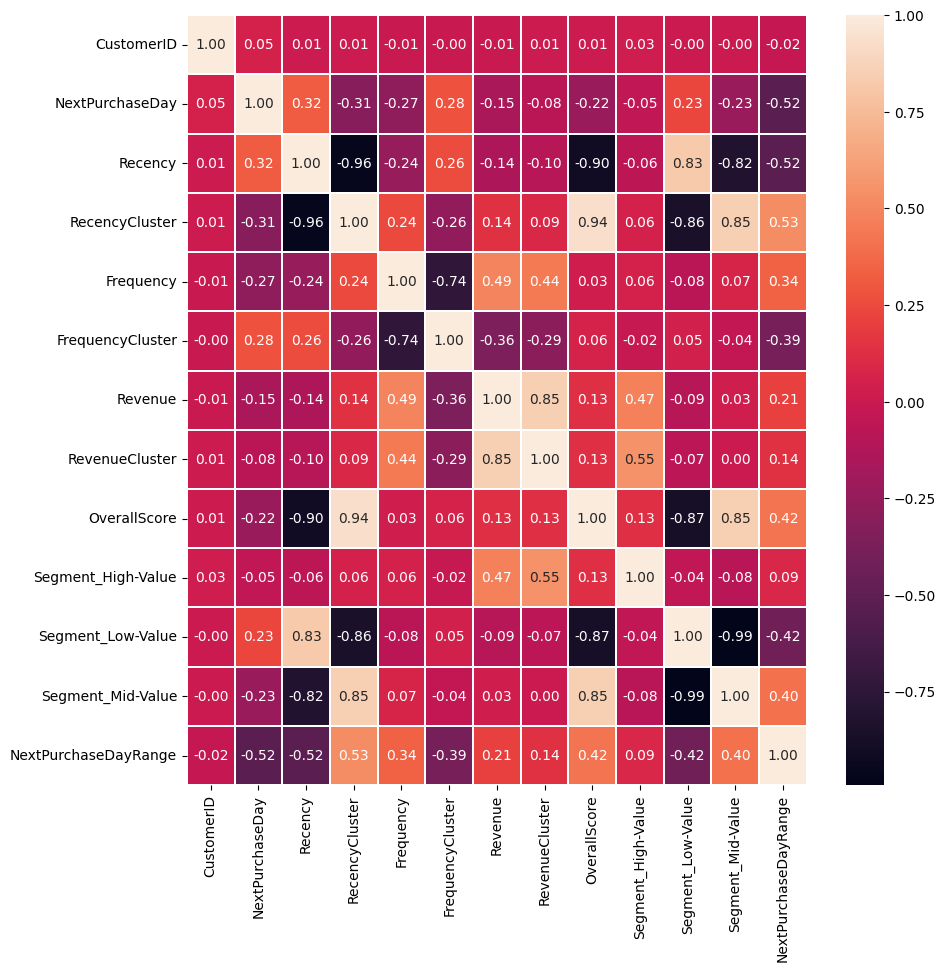

In [360]:
plt.figure(figsize = (10, 10))
sns.heatmap(corr_matrix, annot = True, linewidths=0.2, fmt=".2f");

**Membangun Model MAchine Learning**

In [361]:
ctm_class = ctm_class.drop('NextPurchaseDay', axis=1)

In [362]:
ctm_class

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value,NextPurchaseDayRange
0,13085.0,152,0,63,3,1187.08,0,3,0,1,0,0
1,15362.0,211,0,40,3,613.08,0,3,0,1,0,0
2,13635.0,190,0,105,3,1877.19,0,3,0,1,0,0
3,12636.0,211,0,1,3,141.00,0,3,0,1,0,0
4,12362.0,211,0,1,3,130.00,0,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3047,18102.0,7,3,613,2,312819.64,3,8,1,0,0,1
3048,14646.0,2,3,1564,1,225791.52,3,7,1,0,0,1
3049,14156.0,0,3,2434,1,173245.39,2,6,0,0,1,1
3050,13694.0,1,3,944,1,121350.58,2,6,0,0,1,1


In [363]:
ctm_class['NextPurchaseDayRange'].unique()

array([0, 1])

In [364]:
X, y = ctm_class.drop('NextPurchaseDayRange', axis=1), ctm_class.NextPurchaseDayRange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, shuffle=True)

In [152]:
from sklearn.model_selection import KFold, cross_val_score

In [365]:
# -- Membuat array untuk Model --
models = []
models.append(("LogisticRegression", LogisticRegression()))
models.append(("GaussianNB", GaussianNB()))
models.append(("RandomForestClassifier", RandomForestClassifier()))
models.append(("SVC", SVC()))
models.append(("DecisionTreeClassifier", DecisionTreeClassifier()))
models.append(("xgb.XGBClassifier", xgb.XGBClassifier(eval_metric='mlogloss')))
models.append(("KNeighborsClassifier", KNeighborsClassifier()))

In [366]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

print('Accuracy of Random Forest classifier on training set: {:.2f}'
       .format(rf_model.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
       .format(rf_model.score(X_test[X_train.columns], y_test)))
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.85
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       423
           1       0.76      0.75      0.76       188

    accuracy                           0.85       611
   macro avg       0.83      0.82      0.82       611
weighted avg       0.85      0.85      0.85       611



In [367]:
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of XGB classifier on training set: 1.00
Accuracy of XGB classifier on test set: 0.84
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       423
           1       0.72      0.77      0.75       188

    accuracy                           0.84       611
   macro avg       0.81      0.82      0.81       611
weighted avg       0.84      0.84      0.84       611



In [368]:
parameter = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,5,2)
    }

p_grid_search = GridSearchCV(estimator = xgb.XGBClassifier(eval_metric='mlogloss'),
                             param_grid = parameter,
                             scoring='accuracy',
                             n_jobs=-1,
                             #iid=False,
                             cv=2
                            )

p_grid_search.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 5, 2)},
             scoring='accuracy')

In [369]:
p_grid_search.best_params_, p_grid_search.best_score_

({'max_depth': 3, 'min_child_weight': 1}, 0.8410490594916824)

In [370]:
refined_xgb_model = xgb.XGBClassifier(eval_metric='logloss',
                                      max_depth=list(p_grid_search.best_params_.values())[0]-1,
                                      min_child_weight=list(p_grid_search.best_params_.values())[-1]+4
                                     ).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'.format(refined_xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'.format(refined_xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.88
Accuracy of XGB classifier on test set: 0.87


In [371]:
ref_xgb_pred_y = refined_xgb_model.predict(X_test)

In [372]:
#Merge predictions to original data
ref_xgb_pred_y = refined_xgb_model.predict(X)

ctm_class['predictions'] = ref_xgb_pred_y

ctm_class_final = ctm_class[['CustomerID', 'predictions']]
ctm_class_final

,CustomerID,predictions
0,13085.0,0
1,15362.0,0
2,13635.0,0
3,12636.0,0
4,12362.0,0
...,...,...
3047,18102.0,1
3048,14646.0,1
3049,14156.0,1
3050,13694.0,1


In [404]:
beli_kembali=ctm_class[['CustomerID', 'predictions','Recency']]
beli_kembali


,CustomerID,predictions,Recency
0,13085.0,0,152
1,15362.0,0,211
2,13635.0,0,190
3,12636.0,0,211
4,12362.0,0,211
...,...,...,...
3047,18102.0,1,7
3048,14646.0,1,2
3049,14156.0,1,0
3050,13694.0,1,1


In [375]:
ctm_class['predictions'].value_counts()

predictions
0    2107
1     945
Name: count, dtype: int64

In [388]:
ctm_class_final.to_csv("submission1.csv")

In [389]:
ctm_class_final.to_csv("submission1.csv")
from google.colab import files
files.download("submission1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [393]:
dts=pd.read_csv('submission1.csv')
dts['predictions'].value_counts()

predictions
0    2107
1     945
Name: count, dtype: int64

**Ini Contoh Program Lain**

In [157]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [170]:
models = []
models.append(("Naive Bayes:",GaussianNB()))
print('Models appended...')

Models appended...


In [171]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=2)
    cv_result = cross_val_score(model,X_train,y_train.values.ravel(), cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

Naive Bayes: 100.0
